In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import urllib.request
import json
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Libraries imported.')

Libraries imported.


In [2]:
#get a data-set of crimes in salt lake city(downloaded on kaggle)
df1 = pd.read_csv(r'C:\Users\felix\Desktop\coursera\salt lake city,crime\slc-crime\SLC_Police_Cases_2016_cleaned_geocoded.csv')
df1.head()

,Unnamed: 0,﻿case,ncic code,description,ibr,occurred,reported,day of week,location,city,city council,police zone,police grid,y_coordinate,x_coordinate,x_gps_coords,y_gps_coords
0,0,SL201624,2499-13,STOLEN VEHICLE,240,01/01/2016 12:36:15 AM,01/01/2016 12:36:15 AM,6,1400 S EMERY ST ...,SALT LAKE CITY,2,Z2,123,876155.0,1882550.0,-111.924569,40.737917
1,1,SL201637,5404-0,DUI ALCOHOL,90D,01/01/2016 01:00:24 AM,01/01/2016 01:00:24 AM,6,200 W 500 S ...,SALT LAKE CITY,4,Z3,134,883639.0,1890252.0,-111.896897,40.758555
2,2,SL201656,5404-0,DUI ALCOHOL,90D,01/01/2016 01:23:44 AM,01/01/2016 01:23:44 AM,6,400 S WEST TEMPLE ST ...,SALT LAKE CITY,4,Z3,135,883995.0,1891039.0,-111.894062,40.759542
3,3,SL201648,5499-44,ALCOHOL IN VEH,90D,01/01/2016 01:10:27 AM,01/01/2016 01:10:27 AM,6,NaN,SALT LAKE CITY,SL,40,40,890270.0,1869739.0,-111.971064,40.776482
4,4,SL201660,5404-0,DUI ALCOHOL,90D,01/01/2016 01:33:42 AM,01/01/2016 01:33:42 AM,6,900 S MAIN ST ...,SALT LAKE CITY,5,Z5,152,880413.0,1891819.0,-111.891190,40.749720


In [3]:
df1.describe()

,Unnamed: 0,day of week,y_coordinate,x_coordinate,x_gps_coords,y_gps_coords
count,61240.00000,61240.000000,5.557900e+04,6.051400e+04,55579.000000,55579.000000
mean,30619.50000,4.083132,9.616907e+05,1.884926e+06,-111.755781,40.672947
std,17678.60958,1.944392,2.956102e+06,2.925709e+06,5.372417,3.058414
min,0.00000,1.000000,0.000000e+00,0.000000e+00,-118.457241,-73.285003
25%,15309.75000,2.000000,8.768370e+05,1.882351e+06,-111.915513,40.739895
50%,30619.50000,4.000000,8.843420e+05,1.889051e+06,-111.899550,40.760534
75%,45929.25000,6.000000,8.870980e+05,1.894281e+06,-111.879530,40.767992
max,61239.00000,7.000000,1.111111e+08,1.111111e+08,88.421094,40.840264


In [4]:
df1.shape

(61240, 17)

In [5]:
#clear the datasate_df1 and drop the unneccecary columns
df_clear= df1.drop(columns=['y_coordinate','x_coordinate','Unnamed: 0','ncic code','occurred','reported','police grid','city'])
df_clear.tail()


,﻿case,description,ibr,day of week,location,city council,police zone,x_gps_coords,y_gps_coords
61235,SL2016235945,DRUGS,35A,2,100 S RIO GRANDE ST ...,4,Z3,-111.903987,40.765513
61236,SL2016228081,LARCENY,23C,7,000 E 1700 S ...,5,Z5,-111.890725,40.733588
61237,SL2016226107,PUBLIC PEACE,0,1,800 S 300 E ...,4,Z3,-111.882599,40.750846
61238,SL2016234642,DUI ALCOHOL,90D,7,200 W 500 S ...,4,Z3,-111.898268,40.758553
61239,SL2016238195,OBST POLICE,13B,5,100 W 600 S ...,4,Z3,-111.896122,40.756381


In [6]:
#lets have a look if there are any differnces due to the day (monday,tuesday,...) and the absolut crimes
df_clear['day of week'].unique()

array([6, 3, 7, 1, 5, 4, 2], dtype=int64)

In [7]:
from collections import Counter

day =Counter(df_clear['day of week']).keys() # equals to list(set(words))
day

dict_keys([6, 3, 7, 1, 5, 4, 2])

In [8]:
crime_day=Counter(df_clear['day of week']).values()
crime_day

dict_values([9516, 8950, 8396, 7238, 9099, 9259, 8782])

In [9]:

Tage = pd.DataFrame({'Wochentag' :[6, 3, 7, 1, 5, 4, 2], 'crime_day' :[9516, 8950, 8396, 7238, 9099, 9259, 8782]})
Tage


,Wochentag,crime_day
0,6,9516
1,3,8950
2,7,8396
3,1,7238
4,5,9099
5,4,9259
6,2,8782


In [10]:
Tagenew = Tage.sort_values(["Wochentag"], ascending = True)

Tagenew

,Wochentag,crime_day
3,1,7238
6,2,8782
1,3,8950
5,4,9259
4,5,9099
0,6,9516
2,7,8396


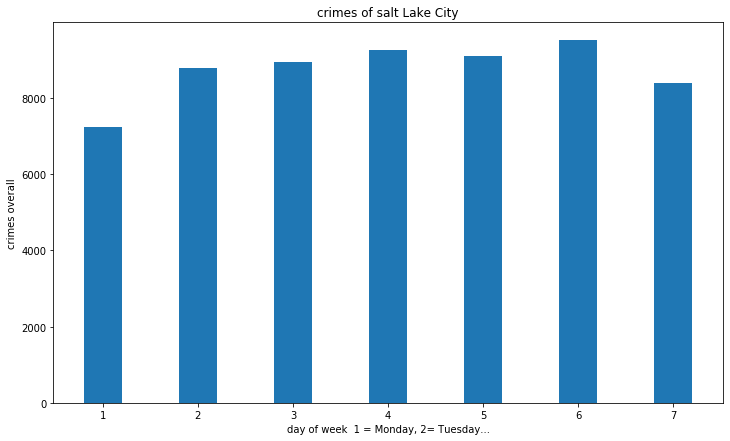

In [16]:
plt.figure(figsize=(12,7))

plt.bar(Tagenew.Wochentag, Tagenew.crime_day,width=0.4)
 
plt.title('crimes of salt Lake City')
plt.ylabel('crimes overall')
plt.xlabel('day of week  1 = Monday, 2= Tuesday...')

plt.show()
#the distribution of crimes in Salt Lake City per day of week(1= Monday, 2= Tuesday, etc....).There are not any statistical differences, cirmes on Monday and Sunday are a bit lower

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [18]:
lm = ols('Wochentag ~ crime_day',data=Tagenew).fit()
table = sm.stats.anova_lm(lm)
print(table)

            df     sum_sq   mean_sq         F    PR(>F)
crime_day  1.0   7.578206  7.578206  1.855421  0.231307
Residual   5.0  20.421794  4.084359       NaN       NaN


In [19]:
#the sam procedure for the type of crimes
df_clear['description'].unique()
from collections import Counter

typecrime =Counter(df_clear['description']).keys()

#typecrime=Counter(df_clear['description']).values()
typecrime


dict_keys(['STOLEN VEHICLE', 'DUI ALCOHOL', 'ALCOHOL IN VEH', 'HIT AND RUN', 'PUBLIC PEACE', 'PUBLIC ORDER', 'ASSAULT', 'LARCENY', 'DAMAGED PROP', 'DRUGS', 'IMP/ABAND VEH', 'ROBBERY', 'INV OF PRIVACY', 'NON MOV TRAF', 'TA- CITY EQUIP', 'ESCAPE', 'STOLEN PROP', 'CONSERVATION', 'WEAPON OFFENSE', 'REPORTABLE TA', 'FRAUD', 'NONREPTABL TA', 'BURGLARY', 'FORGERY', 'OBST POLICE', 'DUI DRUGS', 'LIQUOR', 'ARPRT TITLE 16', 'MORALS-DECENCY', 'KIDNAP', 'FLEEING', 'DUI - CLS A', 'PORNOGRAPHY', 'COMMERCIAL SEX', 'TA-COUNTY EQUI', 'MOV TRAF VIOL', 'DUI - FEL3', 'TRAFFIC', 'INSP COMM VEH', 'OBST JUDICIAL', 'WEAPONS', 'GAMBLING', 'THREATS', 'ARSON', 'EMBEZZLEMENT', nan, 'EXTORTION', 'HEALTH/SAFETY', 'OFCR INV TA', 'PUB PEACE-HOST', 'COUNTERFEITING', 'TA W/COMM VEH', 'AIRPLANE CRASH', 'HOMICIDE', 'PROPERTY CRIME', 'ABORTION', 'TA-INJ/DRUGS', 'TA-INJ/ALCOHOL', 'TA INV TRAIN', 'ARPLN CRASH MI', 'EXPLOITATION', 'MORALS-ANML CR', 'OBST JUD'])

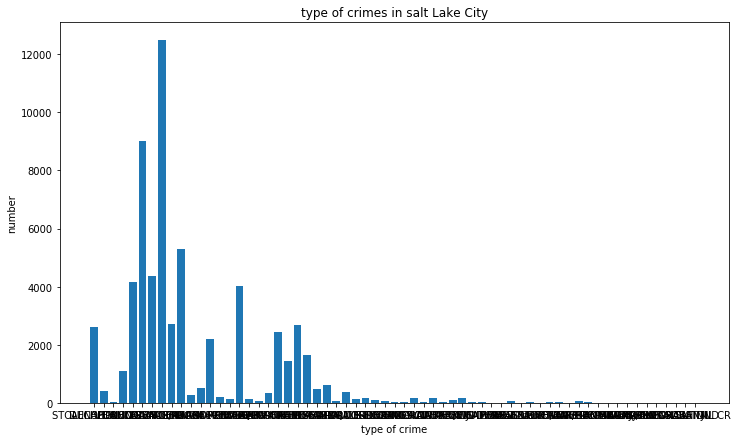

In [20]:

Crime_x = pd.DataFrame({'type' :['STOLEN VEHICLE', 'DUI ALCOHOL', 'ALCOHOL IN VEH', 'HIT AND RUN', 'PUBLIC PEACE', 'PUBLIC ORDER', 'ASSAULT', 'LARCENY', 'DAMAGED PROP', 'DRUGS', 'IMP/ABAND VEH', 'ROBBERY', 'INV OF PRIVACY', 'NON MOV TRAF', 'TA- CITY EQUIP', 'ESCAPE', 'STOLEN PROP', 'CONSERVATION', 'WEAPON OFFENSE', 'REPORTABLE TA', 'FRAUD', 'NONREPTABL TA', 'BURGLARY', 'FORGERY', 'OBST POLICE', 'DUI DRUGS', 'LIQUOR', 'ARPRT TITLE 16', 'MORALS-DECENCY', 'KIDNAP', 'FLEEING', 'DUI - CLS A', 'PORNOGRAPHY', 'COMMERCIAL SEX', 'TA-COUNTY EQUI', 'MOV TRAF VIOL', 'DUI - FEL3', 'TRAFFIC', 'INSP COMM VEH', 'OBST JUDICIAL', 'WEAPONS', 'GAMBLING', 'THREATS', 'ARSON', 'EMBEZZLEMENT', 'nan', 'EXTORTION', 'HEALTH/SAFETY', 'OFCR INV TA', 'PUB PEACE-HOST', 'COUNTERFEITING', 'TA W/COMM VEH', 'AIRPLANE CRASH', 'HOMICIDE', 'PROPERTY CRIME', 'ABORTION', 'TA-INJ/DRUGS', 'TA-INJ/ALCOHOL', 'TA INV TRAIN', 'ARPLN CRASH MI', 'EXPLOITATION', 'MORALS-ANML CR', 'OBST JUD'], 'value' :[2600, 401, 21, 1108, 4146, 8997, 4383, 12478, 2730, 5282, 276, 524, 2206, 191, 135, 4029, 135, 55, 350, 2436, 1456, 2682, 1658, 489, 599, 74, 374, 129, 160, 98, 75, 17, 21, 172, 14, 178, 12, 96, 167, 16, 11, 5, 7, 49, 7, 11, 8, 32, 40, 6, 45, 20, 3, 6, 4, 1, 2, 2, 2, 2, 4, 2, 1]})
plt.figure(figsize=(12,7))

plt.bar(Crime_x.type, Crime_x.value)
 
plt.title('type of crimes in salt Lake City')
plt.ylabel('number')
plt.xlabel('type of crime')

plt.show()


In [21]:
Crime_xsort= Crime_x.sort_values(['value'], ascending = False)
Crime_xsort.head()

,type,value
7,LARCENY,12478
5,PUBLIC ORDER,8997
9,DRUGS,5282
6,ASSAULT,4383
4,PUBLIC PEACE,4146


In [22]:
#i just wanted to see if there are a lot of overlapping gps data(but there are not)the following steps are not neccecary. i wanted to get a bit more familiar with the dataset
df_clear['x_gps_coords'].unique()

array([-111.92456865, -111.89689662, -111.89406162, ..., -111.89965435,
       -111.95525097, -111.88259909])

In [24]:
df_grouped=df_clear.groupby('x_gps_coords')
#df_grouped.first()
  


In [25]:
df_clear['x_gps_coords'].count()

55579

In [26]:
df_clear['city council'].unique()

array(['2', '4', 'SL', '5', '3', '1', '7', nan, '6', 'INV', 'Z6', 'Z1',
       '0', 'A', 'Z4', 'Z5', 'Z3', 'Z2', '49', '40', '02', '43', 'WVC',
       '48', 'D3', '33', '07', 'ADM', '11', '42', '13', '143', 'UI', '53',
       'L'], dtype=object)

In [28]:
X = []

In [29]:
X= df_clear['x_gps_coords']

In [30]:
Y= df_clear['y_gps_coords']

In [31]:
#Y

In [32]:
# clear the rows, where no Lat or lon is given
T=df_clear.loc[:,['description','x_gps_coords','y_gps_coords']]
T.rename(columns={"x_gps_coords": "latitude", "y_gps_coords": "longitude"},inplace= True)
T.head(10)

,description,latitude,longitude
0,STOLEN VEHICLE,-111.924569,40.737917
1,DUI ALCOHOL,-111.896897,40.758555
2,DUI ALCOHOL,-111.894062,40.759542
3,ALCOHOL IN VEH,-111.971064,40.776482
4,DUI ALCOHOL,-111.891190,40.749720
5,HIT AND RUN,-111.880435,40.760737
6,DUI ALCOHOL,-111.885360,40.747617
7,PUBLIC PEACE,-111.848726,40.779466
8,PUBLIC ORDER,-111.923397,40.746762
9,ASSAULT,-111.877815,40.755069


In [34]:
Y_axis = T[['latitude']]
X_axis = T[['longitude']]
result = Y_axis.isnull() 
#print(result)
T.dropna(subset=["latitude"], axis=0, inplace=True)
T.dropna(subset=["longitude"], axis=0, inplace=True)
# reset index, because we droped two rows
T.reset_index(drop=True, inplace=True)
#T

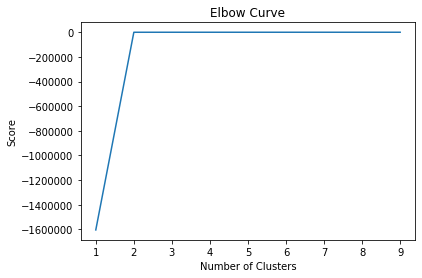

In [35]:
#how many cluster are usefull, in this case two, but i decided to cluster the crimes in 5 cluster 
Y_axis = T[['latitude']]
X_axis = T[['longitude']]

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = T[['latitude']]
X_axis = T[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [36]:
T.describe()

,latitude,longitude
count,55579.000000,55579.000000
mean,-111.755781,40.672947
std,5.372417,3.058414
min,-118.457241,-73.285003
25%,-111.915513,40.739895
50%,-111.899550,40.760534
75%,-111.879530,40.767992
max,88.421094,40.840264


In [37]:
T.head(20)

,description,latitude,longitude
0,STOLEN VEHICLE,-111.924569,40.737917
1,DUI ALCOHOL,-111.896897,40.758555
2,DUI ALCOHOL,-111.894062,40.759542
3,ALCOHOL IN VEH,-111.971064,40.776482
4,DUI ALCOHOL,-111.891190,40.749720
5,HIT AND RUN,-111.880435,40.760737
6,DUI ALCOHOL,-111.885360,40.747617
7,PUBLIC PEACE,-111.848726,40.779466
8,PUBLIC ORDER,-111.923397,40.746762
9,ASSAULT,-111.877815,40.755069


In [39]:
#Clustering the gps data of the dataset in 5 parts
kmeans = KMeans(init="k-means++", n_clusters=5, n_init=12)

kmeans.fit(T[T.columns[1:3]]) # Compute k-means clustering.

T['cluster_label'] = kmeans.fit_predict(T[T.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(T[T.columns[1:3]]) # Labels of each point
#T.head(50)
T.describe()#here i can be sure there are the same counts of lon and lat in the set to go further

,latitude,longitude,cluster_label
count,55579.000000,55579.000000,55579.000000
mean,-111.755781,40.672947,1.449468
std,5.372417,3.058414,1.649322
min,-118.457241,-73.285003,0.000000
25%,-111.915513,40.739895,0.000000
50%,-111.899550,40.760534,0.000000
75%,-111.879530,40.767992,3.000000
max,88.421094,40.840264,4.000000


In [43]:
centers# the center of position 2 is very strange and i decided to drop this center because i expect thats not a valid datapoint

array([[-111.90651896,   40.76176659],
       [  88.42109444,  -73.28500298],
       [-118.45724057,   38.11965276],
       [-111.86734981,   40.73842012],
       [-111.97128477,   40.77486885]])

IndexError: index 3 is out of bounds for axis 1 with size 2

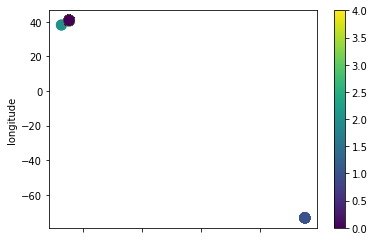

In [44]:
T.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=100, cmap='viridis')
plt.scatter(centers[:, 3], centers[:, 3], c='black', s=200, alpha=0.5)

In [45]:
T.groupby('cluster_label').mean()

,latitude,longitude
cluster_label,,
0,-111.904947,40.761073
1,88.421094,-73.285003
2,-118.457241,38.119653
3,-111.866222,40.737924
4,-111.966934,40.774278


In [46]:
T.head(20)

,description,latitude,longitude,cluster_label
0,STOLEN VEHICLE,-111.924569,40.737917,0
1,DUI ALCOHOL,-111.896897,40.758555,0
2,DUI ALCOHOL,-111.894062,40.759542,0
3,ALCOHOL IN VEH,-111.971064,40.776482,4
4,DUI ALCOHOL,-111.891190,40.749720,0
5,HIT AND RUN,-111.880435,40.760737,3
6,DUI ALCOHOL,-111.885360,40.747617,3
7,PUBLIC PEACE,-111.848726,40.779466,3
8,PUBLIC ORDER,-111.923397,40.746762,0
9,ASSAULT,-111.877815,40.755069,3


In [47]:
T.describe()
T['cluster_label'].value_counts()   

0    30895
3    18052
4     6590
1       40
2        2
Name: cluster_label, dtype: int64

In [48]:
# i delete the data points with label 1, which represents the strange lon and lat above and further i deleted the label 3, because ther a only 2 crimes
ge = T[T.cluster_label != 1]
ged = ge[ge.cluster_label != 2]

In [49]:
ged['cluster_label'].value_counts() 

0    30895
3    18052
4     6590
Name: cluster_label, dtype: int64

In [50]:

#create center and the crime rate according to it
data = [['30895',-111.90651896, 40.76176659], ['18052', -111.86734981, 40.73842012], ['6590', -111.97128477,40.77486885]] 
crime_gps = pd.DataFrame(data, columns = ['crime', 'lon','lat']) 
crime_gps

,crime,lon,lat
0,30895,-111.906519,40.761767
1,18052,-111.867350,40.738420
2,6590,-111.971285,40.774869


In [51]:

#crime_gps.lat[0]

In [52]:
data2= [['spot1',-111.934571 ,40.740516],['spot2',-112.015679,40.754463],['spot3',-111.939156,40.797924]]
other_spots = pd.DataFrame(data2, columns =['spot','lon','lat'])

other_spots
#

,spot,lon,lat
0,spot1,-111.934571,40.740516
1,spot2,-112.015679,40.754463
2,spot3,-111.939156,40.797924


In [53]:
#get lon and lat from Salt Lake City
from geopy.geocoders import Nominatim
address = 'Salt Lake City, Utah'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitudeSALT = location.latitude
longitudeSALT = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitudeSALT, longitudeSALT))

The geograpical coordinate of New York City are 40.7596198, -111.8867975.


In [54]:
m = folium.Map(
    location=[latitudeSALT,longitudeSALT],
    tiles='Stamen Toner',
    zoom_start=12
)
# Make a data frame with dots to show on the map
data = pd.DataFrame({
'lon':[crime_gps.lon[0],crime_gps.lon[1],crime_gps.lon[2]],
'lat':[crime_gps.lat[0],crime_gps.lat[1],crime_gps.lat[2]],
'crime':[crime_gps.crime[0],crime_gps.crime[1], crime_gps.crime[2]]
})
for i in range(0,3):
    folium.Marker([data.iloc[i]['lat'], data.iloc[i]['lon']], popup=data.iloc[i]['crime'],icon = folium.Icon(color='green'),).add_to(m)
    
data2 = pd.DataFrame({
'lon':[other_spots.lon[0],other_spots.lon[1],other_spots.lon[2]],
'lat':[other_spots.lat[0],other_spots.lat[1],other_spots.lat[2]],
'spot':[other_spots.spot[0],other_spots.spot[1], other_spots.spot[2]]
})
for i in range(0,3):
    folium.Marker([data2.iloc[i]['lat'], data2.iloc[i]['lon']], popup=data2.iloc[i]['spot'],icon = folium.Icon(color='blue'),).add_to(m)
# I can add marker one by one on the map

m

#display the "Hotspots=centers of the cluster on the map of Salt Lake City in green
#the other 3 spots i will compare to the cluster centers are displaced in blue 


In [91]:
#Foursqure

In [92]:
#get the venues on a radius of 400 arround the centers of the three crime clusters

In [56]:
CLIENT_ID = 'xxx' # your Foursquare ID
CLIENT_SECRET = 'xxx' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
radius= 400
#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)


In [57]:
url0 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, crime_gps.lat[0], crime_gps.lon[0], VERSION, radius, LIMIT)





In [58]:
import requests
results = requests.get(url0).json()
'There are {} venues around location 1.'.format(len(results['response']['groups'][0]['items']))



'There are 14 venues around location 1.'

In [59]:
url1 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, crime_gps.lat[1], crime_gps.lon[1], VERSION, radius, LIMIT)


results = requests.get(url1).json()
'There are {} venues around location 2.'.format(len(results['response']['groups'][0]['items']))

'There are 5 venues around location 2.'

In [60]:
url2 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, crime_gps.lat[2], crime_gps.lon[2], VERSION, radius, LIMIT)


results = requests.get(url2).json()
'There are {} venues around location 3.'.format(len(results['response']['groups'][0]['items']))

'There are 1 venues around location 3.'

In [98]:
#get the venues on a radius arround the other three spots(blue) 

In [61]:
url_other1 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, other_spots.lat[0], other_spots.lon[0], VERSION, radius, LIMIT)

url_other2 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, other_spots.lat[1], other_spots.lon[1], VERSION, radius, LIMIT)

url_other3 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, other_spots.lat[2], other_spots.lon[2], VERSION, radius, LIMIT)


In [62]:
results = requests.get(url_other1).json()
'There are {} venues around location 1 of the other spot.'.format(len(results['response']['groups'][0]['items']))

'There are 1 venues around location 1 of the other spot.'

In [63]:
results = requests.get(url_other2).json()
'There are {} venues around location 2.'.format(len(results['response']['groups'][0]['items']))

'There are 1 venues around location 2.'

In [64]:
results = requests.get(url_other3).json()
'There are {} venues around location 3.'.format(len(results['response']['groups'][0]['items']))

'There are 4 venues around location 3.'

In [67]:
crime_spots =[14,5,1]
sum(crime_spots)
#there a in sum 20 venues arround the centers of the crime clusters ( green)

20

In [68]:
non_crime_spots = [1,1,4]
sum(non_crime_spots)
##there are in sum 6 venues arround the centers of the non crime spots ( blue)

6

In [69]:
#barchart of the crimes + total venues ,add list of venues to crime_gps
crime_gps['venues_around']= crime_spots
crime_gps

,crime,lon,lat,venues_around
0,30895,-111.906519,40.761767,14
1,18052,-111.867350,40.738420,5
2,6590,-111.971285,40.774869,1


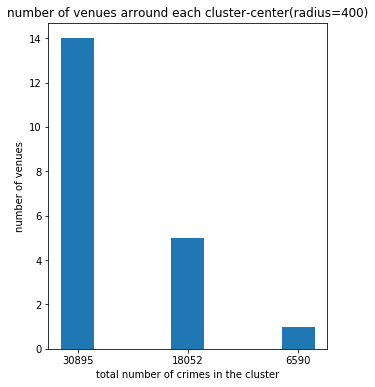

In [72]:
plt.figure(figsize=(5,6))

plt.bar(crime_gps.crime, crime_gps.venues_around,width=0.3)
 
plt.title('number of venues arround each cluster-center(radius=400)')
plt.ylabel('number of venues')
plt.xlabel('total number of crimes in the cluster')

plt.show()


In [94]:
r=np.corrcoef([30895,18052,6590], crime_gps.venues_around)
r

array([[1.       , 0.9828037],
       [0.9828037, 1.       ]])

In [ ]:
#correlation between venues and crime 